### Test inputs

In [4]:
inputs = [
    '..@@.@@@@.',
    '@@@.@.@.@@',
    '@@@@@.@.@@',
    '@.@@@@..@.',
    '@@.@@@@.@@',
    '.@@@@@@@.@',
    '.@.@.@.@@@',
    '@.@@@.@@@@',
    '.@@@@@@@@.',
    '@.@.@@@.@.'
]

## Task 2

In [5]:
def read_input():
    with open("input") as f:
        data = [line.strip() for line in f.readlines()]

    if len(data) == 1:
        return data[0]
    else:
        return data

inputs2 = read_input()

## Sum matrix solution

In [6]:
import numpy as np
import time
import matplotlib.pyplot as plt

def create_sum_array(index_grid):
    sum_array = np.zeros_like(index_grid)
    for i in [1,0,-1]:
        for j in [1, 0, -1]:
            if i == 0 and j == 0:
                continue
            else:
                sum_array += np.roll(index_grid, (i,j), axis=(0,1))
    return sum_array

def solve_gold(inputs):
    index_grid = np.array([[int(row == "@") for row in input] for input in inputs])
    index_grid = np.pad(index_grid, 1)

    total_papers = 0
    counter = 10
    while counter > 0:
        sum_array = create_sum_array(index_grid)
        
        # Multiply
        grid = index_grid * sum_array

        # Mask of items to remove
        mask = (index_grid[1:-1, 1:-1] == 1) & (grid[1:-1, 1:-1] < 4)
        counter = mask.sum()
        
        # Remove these papers
        index_grid[1:-1, 1:-1] = np.where(mask, 0, index_grid[1:-1, 1:-1])
        total_papers += counter
    return total_papers


## Convolution

In [7]:
from scipy.signal import convolve2d

def solve_gold_conv(inputs):
    index_grid = np.array([[int(row == "@") for row in input] for input in inputs])
    index_grid = np.pad(index_grid, 1)

    kernel = np.array([
        [1, 1, 1],
        [1, 0, 1],
        [1, 1, 1]
    ])


    total_papers = 0
    counter = 10
    while counter > 0:

        grid = convolve2d(index_grid[1:-1, 1:-1], kernel)

        mask = (index_grid[1:-1, 1:-1] == 1) & (grid[1:-1, 1:-1] < 4)
        counter = mask.sum()
        
        # Remove these papers 
        index_grid[1:-1, 1:-1] = np.where(mask, 0, index_grid[1:-1, 1:-1])
        total_papers += counter
    return total_papers


## Benchmark

In [8]:
%timeit -n10 -r10 solve_gold(inputs2)
%timeit -n10 -r10 solve_gold_conv(inputs2)

13.6 ms ± 247 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
25.5 ms ± 239 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


Benchmarking size: 20×20
1.01 ms ± 53.8 µs per loop (mean ± std. dev. of 7 runs, 20 loops each)
320 µs ± 1.21 µs per loop (mean ± std. dev. of 7 runs, 20 loops each)
Benchmarking size: 40×40
1.94 ms ± 34.4 µs per loop (mean ± std. dev. of 7 runs, 20 loops each)
1.14 ms ± 12.2 µs per loop (mean ± std. dev. of 7 runs, 20 loops each)
Benchmarking size: 60×60
2.2 ms ± 93.7 µs per loop (mean ± std. dev. of 7 runs, 20 loops each)
1.95 ms ± 15.9 µs per loop (mean ± std. dev. of 7 runs, 20 loops each)
Benchmarking size: 80×80
3.53 ms ± 93.8 µs per loop (mean ± std. dev. of 7 runs, 20 loops each)
4.14 ms ± 73.3 µs per loop (mean ± std. dev. of 7 runs, 20 loops each)
Benchmarking size: 100×100
5.27 ms ± 36.1 µs per loop (mean ± std. dev. of 7 runs, 20 loops each)
7.65 ms ± 242 µs per loop (mean ± std. dev. of 7 runs, 20 loops each)
Benchmarking size: 150×150
7.28 ms ± 186 µs per loop (mean ± std. dev. of 7 runs, 20 loops each)
12.5 ms ± 195 µs per loop (mean ± std. dev. of 7 runs, 20 loops each)

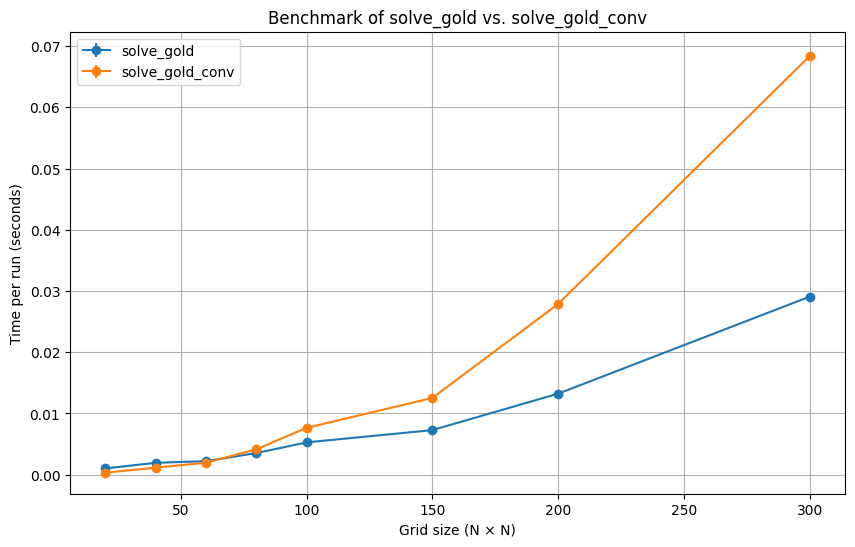

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

def random_input(n, m):
    """Generate an n×m random grid of '.' and '@'."""
    chars = np.array(['.', '@'])
    return [''.join(np.random.choice(chars, m)) for _ in range(n)]

sizes = [20, 40, 60, 80, 100, 150, 200, 300]   # grid sizes
gold_means = []
gold_stds = []
conv_means = []
conv_stds = []

for n in sizes:
    print(f"Benchmarking size: {n}×{n}")
    inp = random_input(n, n)

    # ---- solve_gold ----
    t_gold = %timeit -o -n20 solve_gold(inp)
    gold_means.append(t_gold.average)
    gold_stds.append(t_gold.stdev)

    # ---- solve_gold_conv ----
    t_conv = %timeit -o -n20 solve_gold_conv(inp)
    conv_means.append(t_conv.average)
    conv_stds.append(t_conv.stdev)

#  PLOT RESULTS

plt.figure(figsize=(10,6))
plt.errorbar(sizes, gold_means, yerr=gold_stds, marker='o', label="solve_gold")
plt.errorbar(sizes, conv_means, yerr=conv_stds, marker='o', label="solve_gold_conv")

plt.xlabel("Grid size (N × N)")
plt.ylabel("Time per run (seconds)")
plt.title("Benchmark of solve_gold vs. solve_gold_conv")
plt.grid(True)
plt.legend()
plt.show()
